In [6]:
import seaborn as sns
import json
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# plt.rcParams['axes.linewidth'] = 2.0 #set the value globally
# sns.set(style="whitegrid")
sns.set_style("whitegrid")
# Load results

def read_json(path):
    print("read_json", path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

                    
def transform(entry, atk, agg, m, s):
    if "large" in atk:
        atk_name = r"IPM ($\epsilon = 100$)"
    elif atk == "IPM":
        atk_name = r"IPM ($\epsilon = 0.5$)"
    else:
        atk_name = atk
    # {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887, 'top1': 17.8986}
    return {
        'Round Number': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk_name,
        'AGG': fedavg_methods[agg]['name'],
        r"$\beta$": m,
        'seed': s,
        r"$\delta=0$": False,
    }

In [7]:
ROOT_PATH="../outputs/fedsgd_noniid/f{f}_{atk}_{agg}_m{m}_b{b}_seed{s}/stats"

b=8

attacks = ["IPM", 'IPM_large', "LF", "Noise", "BF", "LF", "ALIE"]
aggs = ["avg", "krum", 'rfa', "autogm", "cm", "tm", "cp", "clustering", 'clippedclustering']
aggs = ["krum", 'rfa', "autogm", "cm", "tm", "cp", "clustering", 'clippedclustering']

fedavg_methods = {
    'avg' : {'name' : 'Mean', 'marker' : '^'}, 
    'rfa' : {'name' : 'GeoMed', 'marker' : 's'}, 
    'autogm' : {'name' : 'AutoGM', 'marker' : 's'}, 
    'krum' : {'name' : 'Krum', 'marker' : '|'}, 
    'cp' : {'name' : 'CC', 'marker' : 'p'}, 
    'cm': {'name' : 'Median', 'marker' : 'D'}, 
    'tm' : {'name' : 'TrimmedMean', 'marker' : '8'}, 
    'clustering' : {'name' : 'Clustering', 'marker' : 'o'}, 
    'clippedclustering' : {'name' : 'ClippedClustering', 'marker' : 'v'}
}
row_order = [fedavg_methods[k]['name'] for k in aggs]

# "krum", 
# Loop over hyperparameters
data_collection = {}
for seed in [0]: 
    for attack in attacks:
        for agg in aggs:
            for m in [0.0]:
                try:
                    path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                    data_collection[path] = read_json(path)
                except Exception as e:
                    print(e)
                    raise 

b = 0
for seed in [0]: 
    attack = 'IPM_large'
    for agg in aggs:
        for m in [0.0]:
            try:
                path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                data_collection[path] = read_json(path)
            except Exception as e:
                print(e)
                raise 


df = []
b=8
for seed in [0]: 
    for attack in attacks:
        for agg in aggs:
            for m in [0.0]:
                try:
                    path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                    validation_entries = data_collection[path]
                    df += list(map(lambda x: transform(x, atk=attack, agg=agg, m=m, s=seed), validation_entries))
                except Exception as e:
                    print("Error", e)
                    raise
df = pd.DataFrame(df)
                    
df_noattack = []
b = 0
for seed in [0]: 
    attack ='IPM_large'
    for agg in aggs:
        for m in [0.0]:
            try:
                path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                validation_entries = data_collection[path]
                atk = 'No Attack'
                df_noattack += list(map(lambda x: transform(x, atk=atk, agg=agg, m=m, s=seed), validation_entries))
            except Exception as e:
                print("Error", e)
                raise
df_noattack = pd.DataFrame(df_noattack)

read_json ../outputs/fedsgd_noniid/f8_IPM_krum_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_rfa_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_autogm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_cm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_tm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_cp_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_clustering_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_clippedclustering_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_krum_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_rfa_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_autogm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_cm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_tm_m0.0_b8_seed0/stats
read_json ../outputs/fedsgd_noniid/f8_IPM_large_cp_m0.0_b8_seed0/stats
read_json ../outp

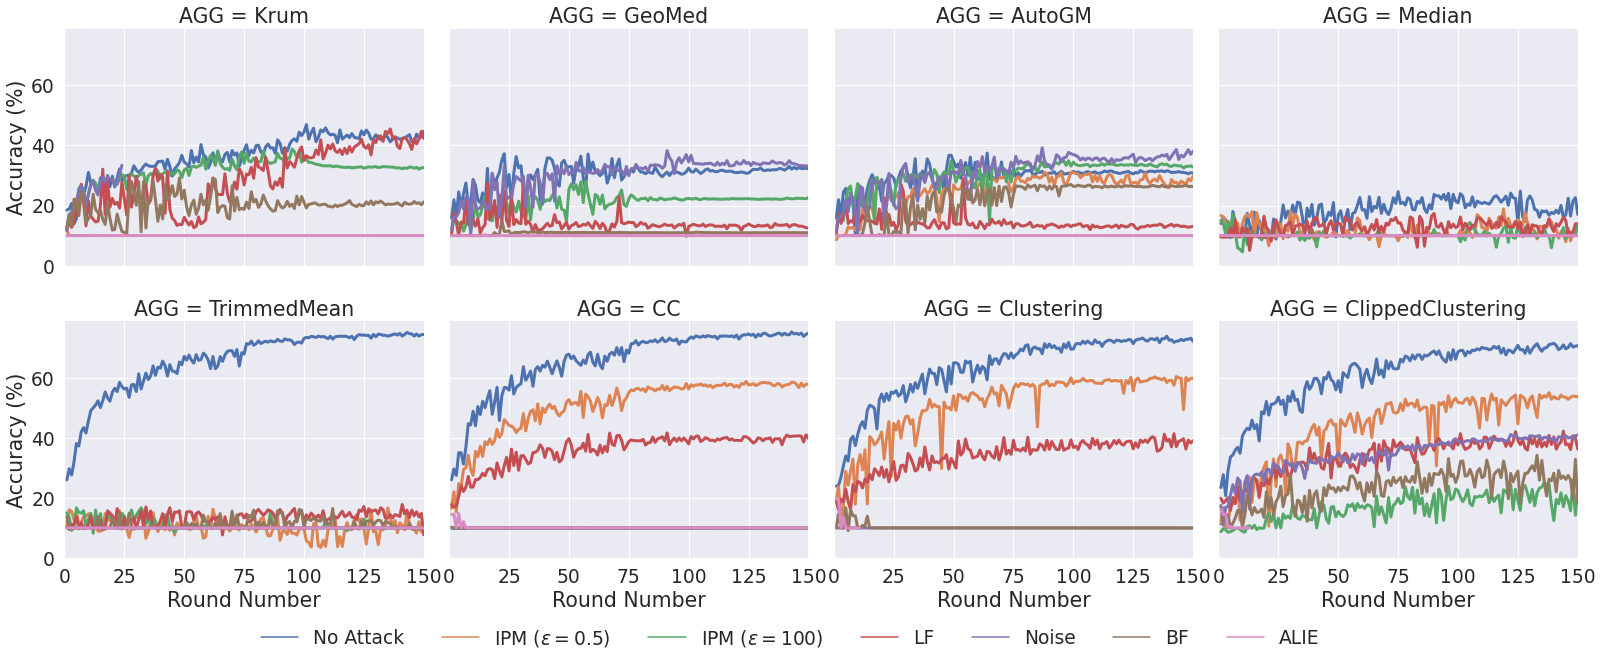

In [8]:
sns.set(font_scale=1.7)
sns.set_style("darkgrid")
data = pd.concat([df_noattack, df],ignore_index=True)
# data = df
g = sns.relplot(
    data=data, 
    x="Round Number", y="Accuracy (%)", 
    col="AGG", 
#     row=r"$\beta$", 
    hue="ATK", 
#     style=r"$\delta=0$",
    height=4.5, aspect=1.25,
#     legend=False,
    ci=None,
    row_order=row_order,
    markers=True,
    col_wrap=4,
    linewidth = 3.0,
    kind="line"
)
# g.set_xticklabels(rotation=45)
g.set(xlim=(0, 150))


sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.05), ncol=8, title=None, frameon=False)

g.savefig("fedsgd_noniid.pdf")#, bbox_inches = "tight") 

In [4]:
ROOT_PATH="../outputs/fedavg_iid/f{f}_{atk}_{agg}_m{m}_b{b}_seed{s}/stats"

def read_json(path):
    print("read_json", path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

b=8
# attacks = ["IPM", 'IPM_large', "Noise", "LF", "ALIE", "BF"]
# aggs = ["krum", 'rfa', "autogm", "cm", "tm", "cp", "clustering", 'clippedclustering']



# "krum", 
# Loop over hyperparameters

data_collection = {}
for seed in [0]: 
    for attack in attacks:
        for agg in aggs:
            for m in [0.0]:
                try:
                    path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                    data_collection[path] = read_json(path)
                except Exception as e:
                    print(e)
                    raise 

for agg in aggs:
    path = ROOT_PATH.format(f=0, atk='IPM_large', agg=agg, m=0.0, b=0, s=0)
    data_collection[path] = read_json(path)
                    

df = []
b=8
for seed in [0]: 
    for attack in attacks:
        for agg in aggs:
            for m in [0.0]:
                try:
                    path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                    validation_entries = data_collection[path]
                    df += list(map(lambda x: transform(x, atk=attack, agg=agg, m=m, s=seed), validation_entries))
                except Exception as e:
                    print("Error", e)
                    raise
                    
                    
df = pd.DataFrame(df)


df_noattack = []
b = 0
for seed in [0]: 
    attack ='IPM_large'
    for agg in aggs:
        for m in [0.0]:
            try:
                path = ROOT_PATH.format(f=b, atk=attack, agg=agg, m=m, b=b, s=seed)
                validation_entries = data_collection[path]
                atk = 'No Attack'
                df_noattack += list(map(lambda x: transform(x, atk=atk, agg=agg, m=m, s=seed), validation_entries))
            except Exception as e:
                print("Error", e)
                raise
df_noattack = pd.DataFrame(df_noattack)

read_json ../outputs/fedavg_iid/f8_IPM_krum_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_rfa_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_autogm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_cm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_tm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_cp_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_clustering_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_clippedclustering_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_krum_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_rfa_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_autogm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_cm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_tm_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_cp_m0.0_b8_seed0/stats
read_json ../outputs/fedavg_iid/f8_IPM_large_clustering_m0.

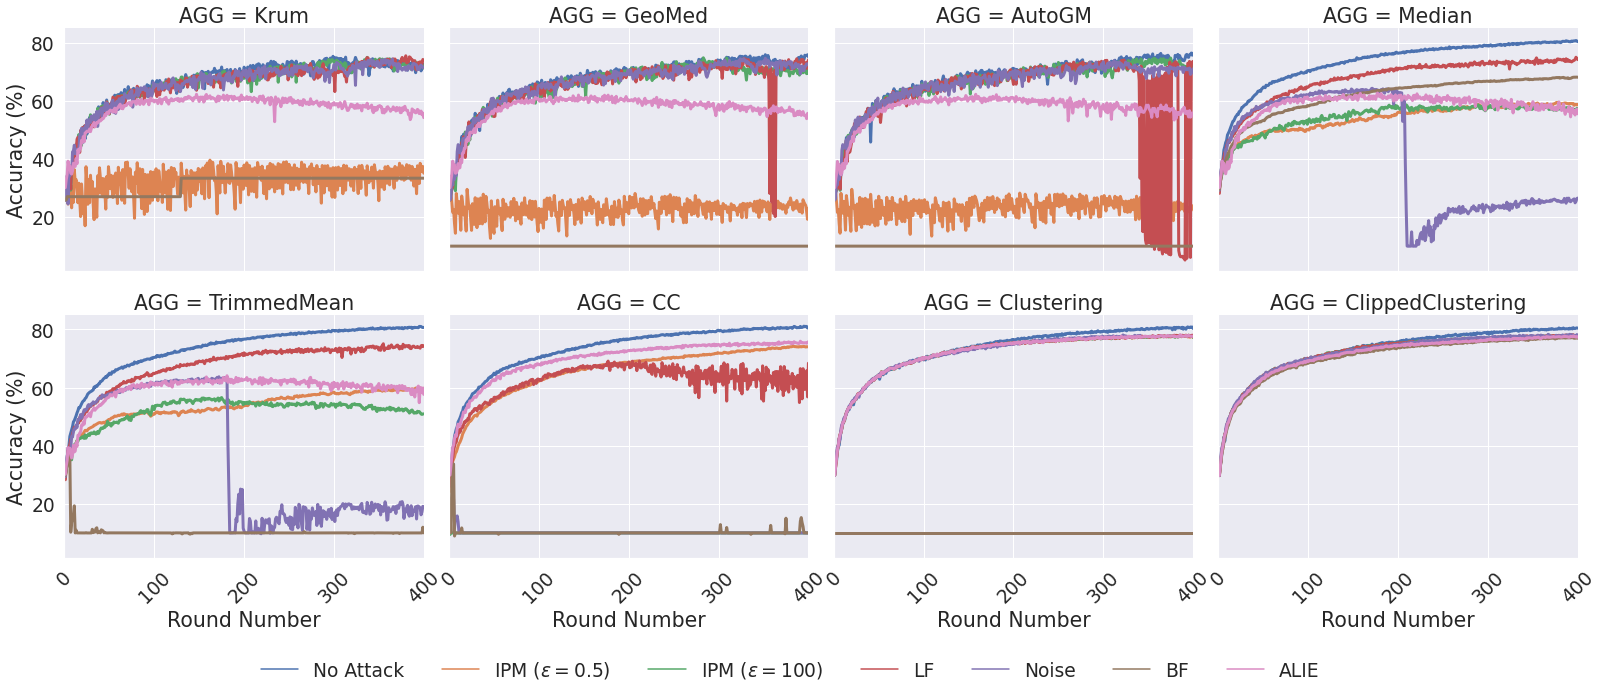

In [5]:
data = pd.concat([df_noattack, df],ignore_index=True)
# data = df
g = sns.relplot(
    data=data, 
    x="Round Number", y="Accuracy (%)", 
    col="AGG", 
#     row=r"$\beta$", 
    hue="ATK", 
#     style=r"$\delta=0$",
    height=4.5, aspect=1.25,
#     legend=False,
    row_order=row_order,
    ci=None,
    markers=True,
    col_wrap=4,
    linewidth = 3.0,
    kind="line"
)

g.set_xticklabels(rotation=45)
g.set(xlim=(0, 400))

sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.1), ncol=8, title=None, frameon=False)

g.savefig("fedavg_iid.pdf")#, bbox_inches = "tight") 